## Hyperparameter optimalisation
Here we define a couple of variations of the model above with slight adjustments to the hyperparameters/structure
The performance of these models is analysed to determine the best model architecture for our current problem.

In [38]:
from python.models.unet_model import get_unet_model
from python.models.filter_model import get_filter_model
from python.models.sampling_model import get_sampling_model
from python.models.metrics import MeanIoU, Precision, Recall
from python.models.dataset import file_loader
from python.helpers.plot import plot_model_history
from keras.callbacks import ModelCheckpoint

In [39]:
#: Model trialing.
models = [{"name": "baseline", "model": get_unet_model, "opt": "rmsprop"},
          {"name": "filters", "model": get_filter_model, "opt": "rmsprop"},
          {"name": "sampling", "model": get_sampling_model,"opt": "rmsprop"}]

In [40]:
image_folder = "../../data/Model Input Data/West_Bengal_15_geolocations_v2/true_colours_images_testset_v2"
mask_folder = "../../data/Model Input Data/West_Bengal_15_geolocations_v2/mask_completed"
train_gen, val_gen = file_loader(image_folder, mask_folder)[0:2]

In [41]:
img_size, num_classes, history = (512, 512), 2, []
for entry in models:
    model = entry["model"](img_size, num_classes)
    model.compile(optimizer=entry["opt"], loss="sparse_categorical_crossentropy", metrics=[MeanIoU(num_classes=2), Precision(), Recall()])
    callbacks = [ModelCheckpoint(f"./h5/image_segmentation_{entry['name']}.h5", save_best_only = True)]
    outcome = model.fit(train_gen, epochs=25, callbacks=callbacks, validation_data=val_gen)
    history.append(outcome.history)

Epoch 1/25
45/45 [==============================] - 20s 223ms/step - loss: 4.5949 - mean_iou: 0.3793 - precision: 0.2909 - recall: 0.3291 - val_loss: 4.6498 - val_mean_iou: 0.3815 - val_precision: 0.4165 - val_recall: 0.0019
Epoch 2/25
45/45 [==============================] - 9s 189ms/step - loss: 0.8833 - mean_iou: 0.3694 - precision: 0.2248 - recall: 0.1363 - val_loss: 0.7429 - val_mean_iou: 0.3857 - val_precision: 0.2488 - val_recall: 0.2075
Epoch 3/25
45/45 [==============================] - 9s 191ms/step - loss: 0.7195 - mean_iou: 0.3781 - precision: 0.3011 - recall: 0.1356 - val_loss: 0.6071 - val_mean_iou: 0.3950 - val_precision: 0.2704 - val_recall: 0.0820
Epoch 4/25
45/45 [==============================] - 9s 192ms/step - loss: 0.6434 - mean_iou: 0.3641 - precision: 0.1861 - recall: 0.0369 - val_loss: 0.5821 - val_mean_iou: 0.3981 - val_precision: 0.3336 - val_recall: 0.0582
Epoch 5/25
45/45 [==============================] - 9s 189ms/step - loss: 0.6190 - mean_iou: 0.3749 - p

45/45 [==============================] - 19s 420ms/step - loss: 0.5883 - mean_iou: 0.3836 - precision: 0.2818 - recall: 0.0388 - val_loss: 0.5778 - val_mean_iou: 0.3810 - val_precision: 0.3489 - val_recall: 7.9217e-04
Epoch 13/25
45/45 [==============================] - 19s 420ms/step - loss: 0.6127 - mean_iou: 0.3755 - precision: 0.2094 - recall: 0.0080 - val_loss: 0.5778 - val_mean_iou: 0.3815 - val_precision: 0.3975 - val_recall: 0.0020
Epoch 14/25
45/45 [==============================] - 19s 417ms/step - loss: 0.6086 - mean_iou: 0.3850 - precision: 0.3056 - recall: 0.0304 - val_loss: 0.6518 - val_mean_iou: 0.3807 - val_precision: 0.5312 - val_recall: 4.9420e-05
Epoch 15/25
45/45 [==============================] - 19s 420ms/step - loss: 0.6039 - mean_iou: 0.3768 - precision: 0.3673 - recall: 0.0339 - val_loss: 1.0315 - val_mean_iou: 0.3809 - val_precision: 0.4433 - val_recall: 5.0582e-04
Epoch 16/25
45/45 [==============================] - 19s 419ms/step - loss: 0.6379 - mean_iou: 0

45/45 [==============================] - 11s 239ms/step - loss: 0.3926 - mean_iou: 0.6231 - precision: 0.7566 - recall: 0.5161 - val_loss: 0.6024 - val_mean_iou: 0.4087 - val_precision: 0.3091 - val_recall: 0.1410
Epoch 24/25
45/45 [==============================] - 11s 239ms/step - loss: 0.3984 - mean_iou: 0.6155 - precision: 0.7602 - recall: 0.5028 - val_loss: 0.6876 - val_mean_iou: 0.3934 - val_precision: 0.2635 - val_recall: 0.0781
Epoch 25/25
45/45 [==============================] - 11s 240ms/step - loss: 0.3870 - mean_iou: 0.6371 - precision: 0.7816 - recall: 0.5346 - val_loss: 0.7084 - val_mean_iou: 0.4100 - val_precision: 0.3295 - val_recall: 0.1188


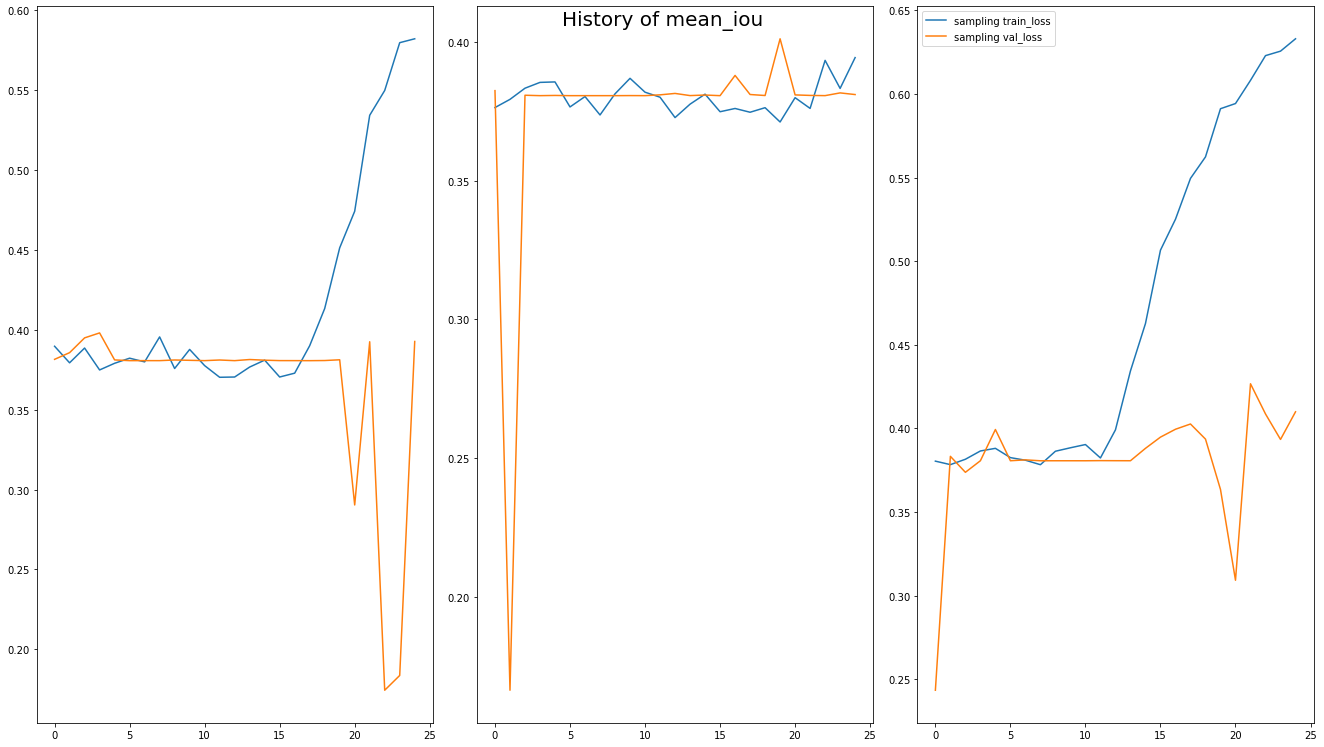

In [42]:
plot_model_history('mean_iou', history, models)

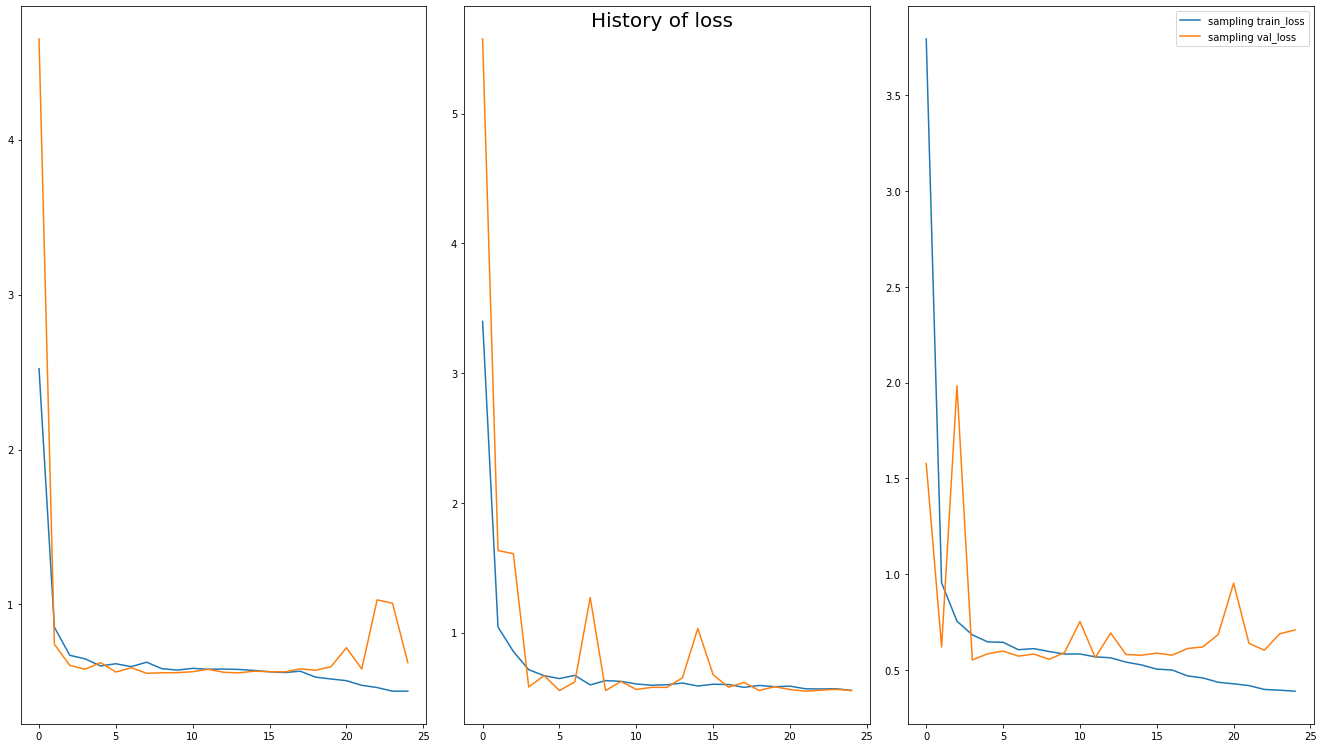

In [43]:
plot_model_history('loss', history, models)

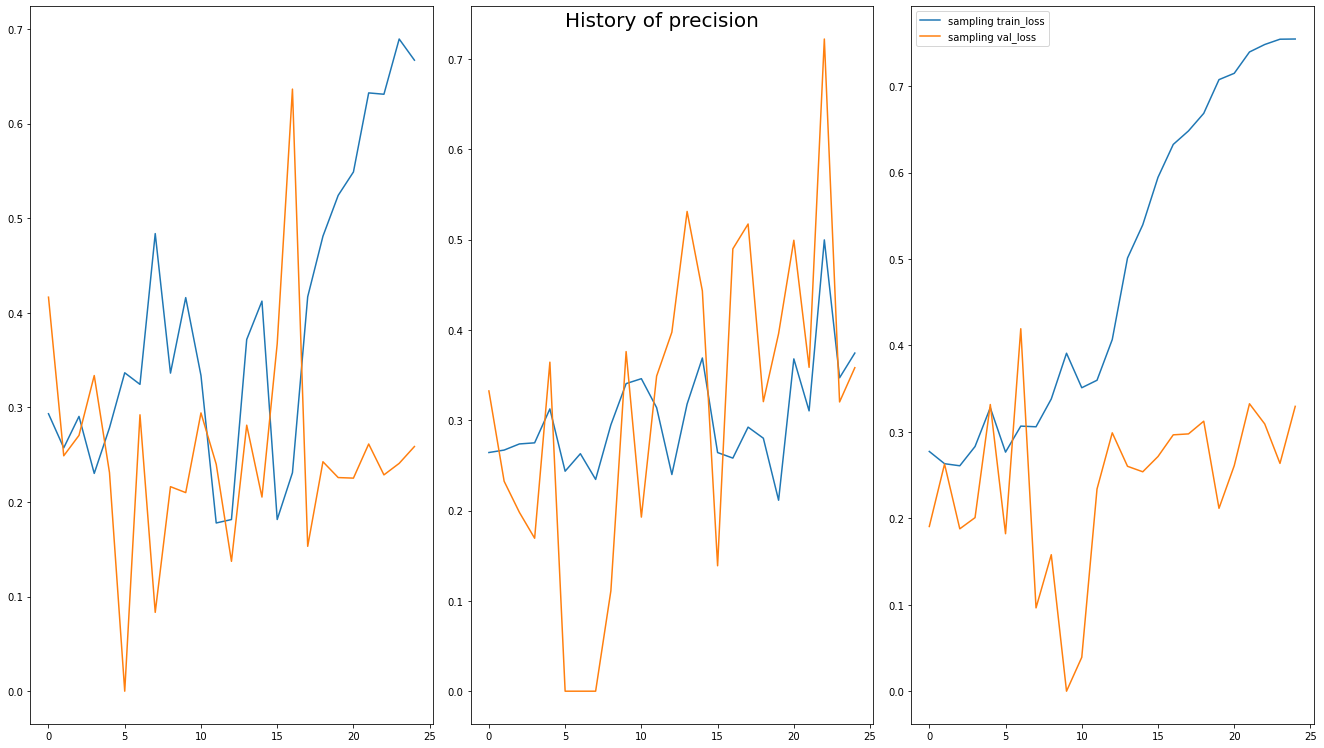

In [44]:
plot_model_history('precision', history, models)

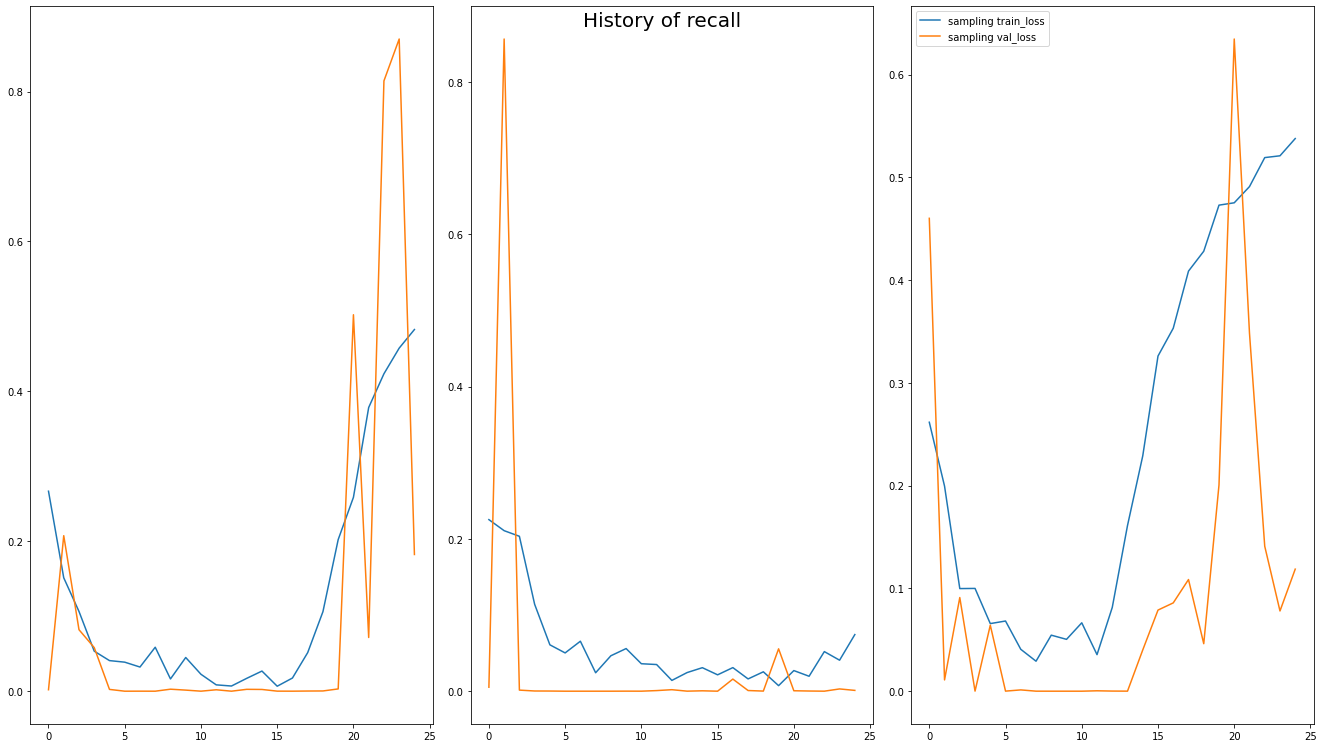

In [45]:
plot_model_history('recall', history, models)